In [1]:
from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,roc_auc_score,f1_score,recall_score,make_scorer,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_curve,auc,accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from catboost import CatBoostClassifier

In [2]:

import lightgbm as lgb
 
# Similarly LGBMRegressor can also be imported for a regression model.
from lightgbm import LGBMClassifier

In [3]:
df = pd.read_csv("./Data_clean/min_max_both_inter_scaled.csv")

In [4]:
X = df.drop(["FLAG","CONS_NO"],axis=1)

In [5]:
y= df.FLAG

In [6]:
X= np.array(X.values)

In [7]:
y= np.array(y.values)

## building a  model without any over-sampling

In [8]:
model_light = LGBMClassifier(n_jobs=-1,)

In [9]:
model_light.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [12]:
grid_light = GridSearchCV(
    estimator=LGBMClassifier(n_jobs=-1),
    param_grid={"class_weight":[{0:1,1:v} for v in range(2,5)],
               },
    scoring={"precision": make_scorer(precision_score),
            "recall":make_scorer(recall_score),
            "f1_score":make_scorer(f1_score),
           "roc_auc_score":make_scorer(roc_auc_score)
            },
    refit="roc_auc_score",
    return_train_score=True,
    verbose=1,
    cv=3,
    n_jobs=-1
    
    
)

In [13]:
grid_light.fit(X,y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 1, 1: 4}]},
             refit='roc_auc_score', return_train_score=True,
             scoring={'f1_score': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score),
                      'roc_auc_score': make_scorer(roc_auc_score)},
             verbose=1)

In [15]:
results = pd.DataFrame(grid_light.cv_results_)

In [16]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,...,split1_test_roc_auc_score,split2_test_roc_auc_score,mean_test_roc_auc_score,std_test_roc_auc_score,rank_test_roc_auc_score,split0_train_roc_auc_score,split1_train_roc_auc_score,split2_train_roc_auc_score,mean_train_roc_auc_score,std_train_roc_auc_score
0,84.865551,0.772899,0.396290,0.029188,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.650655,0.633094,0.632812,0.638854,...,0.569592,0.564051,0.564273,0.004255,3,0.768962,0.767434,0.777079,0.771158,0.004233
1,86.893450,0.390846,0.448001,0.049421,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.621693,0.548309,0.584000,0.584667,...,0.587491,0.585405,0.588513,0.003042,2,0.823129,0.828016,0.829595,0.826913,0.002752
2,72.187414,21.923257,0.301748,0.047051,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.528195,0.485618,0.490741,0.501518,...,0.607852,0.599817,0.605058,0.003709,1,0.868296,0.869885,0.864800,0.867660,0.002124


## doing the  classification without oversampling

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [18]:
model_light = LGBMClassifier(n_jobs=-1,max_depth=10,class_weight={0:1,1:4})


In [21]:
model_light.fit(x_train,y_train)

LGBMClassifier(class_weight={0: 1, 1: 4}, max_depth=10)

In [22]:
y_pred =model_light.predict(x_test)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7320
           1       0.51      0.24      0.33       732

    accuracy                           0.91      8052
   macro avg       0.72      0.61      0.64      8052
weighted avg       0.89      0.91      0.90      8052



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix Lightboost @80
[[7152  168]
 [ 554  178]]
Normalized confusion matrix
[[0.97704918 0.02295082]
 [0.7568306  0.2431694 ]]


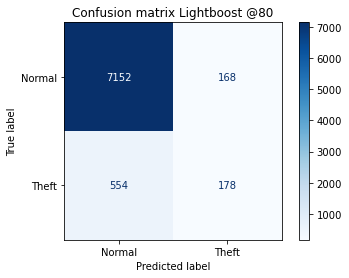

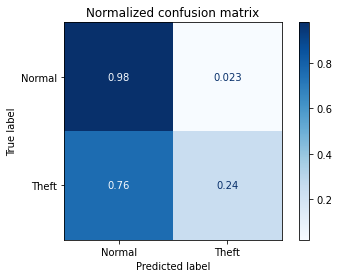

In [27]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix Lightboost @80",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_light,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [28]:
probs = model_light.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

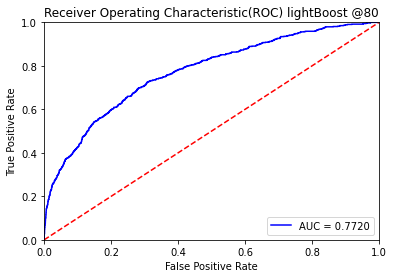

In [29]:
plt.title("Receiver Operating Characteristic(ROC) lightBoost @80")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### Doing Oversampling  100%

In [30]:
#oversampling of minority class (imbalanced learning)
over = SMOTE(sampling_strategy=1,random_state=0)
over_x_train,over_y_train = over.fit_resample(X,y)

In [31]:
model_light = LGBMClassifier(n_jobs=-1,max_depth=10,class_weight={0:1,1:4})


In [32]:
x_train,x_test,y_train,y_test = train_test_split(over_x_train,over_y_train,test_size=0.20)

In [33]:
model_light.fit(x_train,y_train)

LGBMClassifier(class_weight={0: 1, 1: 4}, max_depth=10)

In [34]:
y_pred =model_light.predict(x_test)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73      7348
           1       0.71      0.98      0.82      7323

    accuracy                           0.78     14671
   macro avg       0.83      0.78      0.78     14671
weighted avg       0.83      0.78      0.78     14671



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix Lightboost @80
[[4356 2992]
 [ 170 7153]]
Normalized confusion matrix
[[0.59281437 0.40718563]
 [0.02321453 0.97678547]]


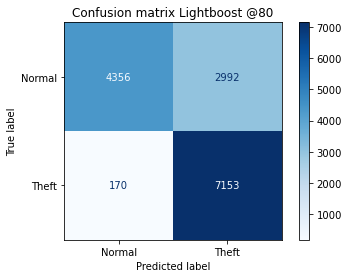

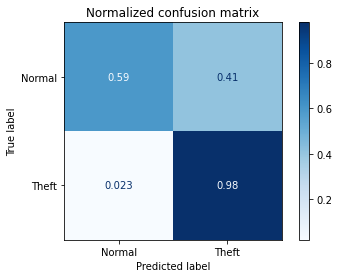

In [36]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix Lightboost @80",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_light,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [37]:
probs = model_light.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

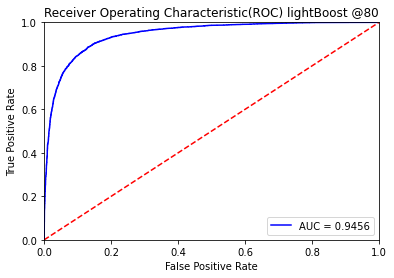

In [38]:
plt.title("Receiver Operating Characteristic(ROC) lightBoost @80")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## doing 

In [39]:
model_light = LGBMClassifier(n_jobs=-1,max_depth=10)


In [40]:
model_light.fit(x_train,y_train)

LGBMClassifier(max_depth=10)

In [41]:
y_pred =model_light.predict(x_test)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7348
           1       0.86      0.88      0.87      7323

    accuracy                           0.87     14671
   macro avg       0.87      0.87      0.87     14671
weighted avg       0.87      0.87      0.87     14671



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix Lightboost @80
[[6332 1016]
 [ 851 6472]]
Normalized confusion matrix
[[0.86173108 0.13826892]
 [0.1162092  0.8837908 ]]


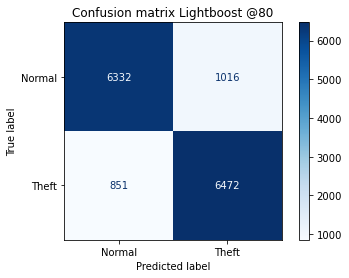

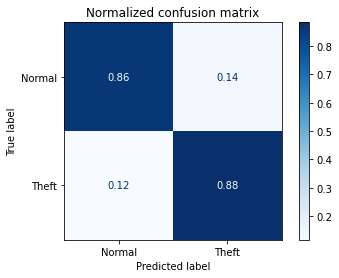

In [43]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix Lightboost @80",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_light,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()